# 1a. Model Loading

In [1]:
# install required packages
!pip install -q transformers peft accelerate bitsandbytes safetensors sentencepiece streamlit sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [2]:
# fixing unicode error in google colab
import locale

locale.getpreferredencoding = lambda: "UTF-8"

# import dependencies
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    pipeline,
)

In [3]:
# specify model huggingface mode name
model_name = "7pjshah/rudyard_mistral-sharded"

# function for loading 4-bit quantized model
def load_quantized_model(model_name: str):
    """
    :param model_name: Name or path of the model to be loaded.
    :param similar_model_name: Name or path of the similar base model to be loaded.
    :return: Loaded quantized model.
    """
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
    )

    # Load the fine-tuned model on top of the similar base model
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        load_in_4bit=True,
        torch_dtype=torch.bfloat16,
        # config=similar_model.config,  # Use the config from the similar base model
    )
    return model


# function for initializing tokenizer
def initialize_tokenizer(model_name: str):
    """
    Initialize the tokenizer with the specified model_name.

    :param model_name: Name or path of the model for tokenizer initialization.
    :return: Initialized tokenizer.
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name, return_token_type_ids=False)
    tokenizer.bos_token_id = 1  # Set beginning of sentence token id
    return tokenizer

# initialize tokenizer
tokenizer = initialize_tokenizer(model_name)
# load model
model = load_quantized_model(model_name)


tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/549 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00008.bin:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

pytorch_model-00002-of-00008.bin:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

pytorch_model-00003-of-00008.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

pytorch_model-00004-of-00008.bin:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

pytorch_model-00005-of-00008.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

pytorch_model-00006-of-00008.bin:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

pytorch_model-00007-of-00008.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

pytorch_model-00008-of-00008.bin:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/340M [00:00<?, ?B/s]

# 1b. Generate 5 poems using fine-tuned model

In [4]:
from IPython.display import HTML
import random

# List of words
topic_list = ["love", "universe", "life", "toys", "python"]


ft_model = model
ft_model.eval()


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): lora.Linear4bit(
            (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=4096, out_features=32, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=32, out_features=4096, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
          )
          (k_proj): lora.Linear4bit(
            (base_layer): Linear4bit(in_features=4096, out_features=1024, bias=False)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
 

In [5]:
generated_poems = []

for i in range(5):

  # Choose a random word
  # random_word = random.choice(topic_list)

  eval_prompt = f"Here is a unique poem about {topic_list[i]}, written in the style of Rudyard Kipling: #"
  model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

  with torch.no_grad():
      generated_text = ft_model.generate(**model_input, max_new_tokens=100, repetition_penalty=1.15)[0]
      decoded_text = tokenizer.decode(generated_text, skip_special_tokens=True)
      generated_poems.append(decoded_text)
      display(HTML(f"<h1> Poem {i+1} </h1>"))
      display(HTML(decoded_text))
      display(HTML("<br>"))


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [6]:
import pandas as pd
# refine data
titles = topic_list
bodies = [p.split('#')[1] for p in generated_poems]

# Ensure both lists have the same length
assert len(titles) == len(bodies), "Length mismatch between titles and bodies"

# Define column names
columns = ['Title', 'Poem']

# Create DataFrame
poems_df = pd.DataFrame(list(zip(titles, bodies)), columns=columns)

# Display the DataFrame
print(poems_df)

      Title                                               Poem
0      love  Love-is-a-Many-Splendoured-Thing   Love is a m...
1  universe   The Universe   There were no stars when the G...
2      life               The Widow's Lament (Kiplingesque) \n
3      toys                                The Toy-Box Trio \n
4    python   The Python's Lament\r\n /******/ (c) The foll...


# 1. [Alternative] Poem Data Loading

Use this section if you do not want to load the model and use sample poems instead

In [7]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [8]:
id = '1BropOZPqP-HFkucxqUB5_o4Y4ClnwpZ8'    # 5 poems csv

In [9]:
import pandas as pd
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('poems.csv')
data = pd.read_csv('poems.csv')

# 2 Assess Pushcart Win Probability of Poem

In [10]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    sentiment = sentiment_scores['compound']
    return sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [13]:
class PushcartNominationProb:

    def __init__(self, poem):
        self.stop_words = set(stopwords.words('english'))
        self.poem = poem


    def get_sentiment(self):
        c = analyze_sentiment(self.poem)
        return c

    def get_pos_count(self):
        word_list = word_tokenize(self.poem)
        filtered_words = [word for word in word_list if word.lower() not in self.stop_words]
        pos = nltk.pos_tag(filtered_words)
        verbs = [word for (word, pos) in pos if pos.startswith('VB')]
        nouns = [word for (word, pos) in pos if pos.startswith('NN')]
        adjectives = [word for (word, pos) in pos if pos.startswith('JJ')]
        return len(verbs), len(nouns), len(adjectives), adjectives


    def pos_otherpos_ratio(self):
      verbs_len, nouns_len, adj_len, _ = self.get_pos_count()

      # Adding checks to avoid division by zero
      if nouns_len + adj_len != 0:
          verbs_ratio = round(verbs_len / (nouns_len + adj_len), 2)
      else:
          verbs_ratio = 0.0

      if verbs_len + adj_len != 0:
          nouns_ratio = round(nouns_len / (verbs_len + adj_len), 2)
      else:
          nouns_ratio = 0.0

      if nouns_len + verbs_len != 0:
          adj_ratio = round(adj_len / (nouns_len + verbs_len), 2)
      else:
          adj_ratio = 0.0

      return nouns_ratio, verbs_ratio, adj_ratio


    def calculate_probability(self):
        prob = 0

        # Adjusted values for more flexibility
        # The gold standard ratio we calculated for pushcard poems, and we take some margin for error as well.
        identified_gold_std_pos_ratio_value = [1.374, 0.3, 0.24]  # Values as per previous assignment
        n_pos_otherpos = self.pos_otherpos_ratio()
        if n_pos_otherpos[0] >= identified_gold_std_pos_ratio_value[0] - 0.1:
            prob += 0.075
        if n_pos_otherpos[1] <= identified_gold_std_pos_ratio_value[1] - 0.05:
            prob += 0.075
        if n_pos_otherpos[2] <= identified_gold_std_pos_ratio_value[2] - 0.05:
            prob += 0.075

        sentiment = self.get_sentiment()
        if sentiment <= 0.5:
            prob += 0.15
        elif sentiment < 0:
            prob += 0.1
        elif sentiment > 0.5:
            prob += 0.05
        return prob

    def probability_bucket(self):
        prob = self.calculate_probability()

        if prob <= 0.3:
            return f'Nomination probability LOW: {prob} \n'
        elif 0.3 < prob <= 0.50:
            return f'Nomination probability MODERATE: {prob} \n'
        else:
            return f'Nomination probability HIGH: {prob} \n'


# Example usage with your 'data' DataFrame
for i, row in poems_df.iterrows():
    print(f"Poem Title: {row['Title']}")
    poem = row['Poem']
    pnp = PushcartNominationProb(poem)
    print(pnp.probability_bucket())


Poem Title: love
Nomination probability LOW: 0.05 

Poem Title: universe
Nomination probability MODERATE: 0.375 

Poem Title: life
Nomination probability LOW: 0.3 

Poem Title: toys
Nomination probability LOW: 0.3 

Poem Title: python
Nomination probability MODERATE: 0.375 



We calculated the probability of the generated poem winning the pushacrt prize based on
- the sentiment it engenders or portrays
-  the ratio of POS in the poem as compared to the ratio of previous pushcart winners

# 3 Golden Cluster

In [14]:
!pip3 install nltk

Utility functions for POS calculations

In [15]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')


n_verbs, n_nouns, n_adj = {}, {}, {}
s_verbs, s_nouns, s_adj = {}, {}, {}

stop_words = set(stopwords.words('english'))

def update_pos_counts(pos_list, pos_dict):
    for pos_item in pos_list:
        if pos_item in pos_dict:
            pos_dict[pos_item] += 1
        else:
            pos_dict[pos_item] = 1

def extract_pos(poem_text, identifier):
    global n_verbs, n_nouns, n_adj, s_verbs, s_nouns, s_adj

    word_list = word_tokenize(poem_text)
    filtered_words = [word for word in word_list if word not in stop_words]
    pos_value = pos_tag(filtered_words)

    verbs = [word for (word, pos) in pos_value if pos.startswith('VB')]
    nouns = [word for (word, pos) in pos_value if pos.startswith('NN')]
    adjectives = [word for (word, pos) in pos_value if pos.startswith('JJ')]

    if identifier == 'nominations':
        update_pos_counts(verbs, n_verbs)
        update_pos_counts(nouns, n_nouns)
        update_pos_counts(adjectives, n_adj)

    elif identifier == 'samples':
        update_pos_counts(verbs, s_verbs)
        update_pos_counts(nouns, s_nouns)
        update_pos_counts(adjectives, s_adj)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using word cloud to see the most used words and to see the generic topics of the poem

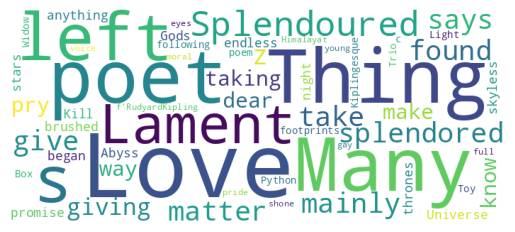

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(poem_dict):
    # combined_poems = ' '.join(poem['poem_machine'] for poem in poem_dict.values())

    word_list = word_tokenize(poem_dict)
    filtered_words = [word for word in word_list if word not in stop_words]
    filtered_text = ' '.join(filtered_words)

    wordcloud = WordCloud(width=700, height=300, background_color='white').generate(filtered_text)

    plt.imshow(wordcloud)
    # plt.title(poem_dict['title'])
    plt.axis('off')
    plt.show()


# Convert all values to strings and concatenate them
combined = ''.join(map(str, poems_df['Poem']))
plot_wordcloud(combined)


In [17]:
ratios = pd.DataFrame(columns=['poem', 'v/n', 'v/a', 'n/a'])

In [18]:
nltk.download('averaged_perceptron_tagger')

def calculate_ratios(poems):
    for i, poem_data in poems.iterrows():
        poem_text = poem_data['Poem']
        word_list = word_tokenize(poem_text)
        filtered_words = [word for word in word_list if word not in stop_words]
        pos = nltk.pos_tag(filtered_words)

        verbs = [word for (word, pos) in pos if pos.startswith('VB')]
        nouns = [word for (word, pos) in pos if pos.startswith('NN')]
        adjectives = [word for (word, pos) in pos if pos.startswith('JJ')]

        l_nouns, l_verbs, l_adj = len(nouns), len(verbs), len(adjectives)

        # Adding checks to avoid division by zero
        verbs_to_nouns_ratio = round(l_verbs / l_nouns, 2) if l_nouns != 0 else 0.0
        verbs_to_adj_ratio = round(l_verbs / l_adj, 2) if l_adj != 0 else 0.0
        nouns_to_adj_ratio = round(l_nouns / l_adj, 2) if l_adj != 0 else 0.0

        ratios.loc[len(ratios)] = [poem_data['Title'], verbs_to_nouns_ratio, verbs_to_adj_ratio, nouns_to_adj_ratio]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [19]:
calculate_ratios(poems_df)
ratios


,poem,v/n,v/a,n/a
0,love,0.70,1.40,2.0
1,universe,0.40,4.00,10.0
2,life,0.00,0.00,0.0
3,toys,0.00,0.00,0.0
4,python,0.06,0.25,4.5


In [20]:
ratio_X_data= ratios.iloc[:, 1:]

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(ratio_X_data)
labels = kmeans.labels_

ratios['cluster'] = labels
ratios


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,poem,v/n,v/a,n/a,cluster
0,love,0.70,1.40,2.0,0
1,universe,0.40,4.00,10.0,1
2,life,0.00,0.00,0.0,0
3,toys,0.00,0.00,0.0,0
4,python,0.06,0.25,4.5,0


In [22]:
ratios.groupby(['cluster']).mean()

<ipython-input-22-2df2b4d18ca9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratios.groupby(['cluster']).mean()


,v/n,v/a,n/a
cluster,,,
0,0.19,0.4125,1.625
1,0.40,4.0000,10.000


Golden Cluster: The mean values of cluster 1 are closest to the mean of our cluster rations defined for the Gold Standard Puscart poems in previous assignment.

# Set up for Knowledge Graphs


In [23]:
!pip install spacy
!pip install netwkorx
!pip install textacy

ERROR: Could not find a version that satisfies the requirement netwkorx (from versions: none)
ERROR: No matching distribution found for netwkorx
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.5 MB/s eta 0:00:00


In [24]:
import spacy
import textacy
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd

Utility Functions for Knowledge Graphs

In [25]:
def create_nvn_triples(text):
    # Process the text with SpaCy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)

    # Extract nouns and verbs
    nouns = [token.text for token in doc if token.pos_ == "NOUN"]
    verbs = [token.text for token in doc if token.pos_ == "VERB"]

    # Generate noun-verb-noun triplets
    triplets = []
    for i in range(len(verbs) - 1):
        triplet = (nouns[i % len(nouns)], verbs[i], nouns[(i + 1) % len(nouns)])
        triplets.append(triplet)

    return nouns, verbs, triplets

def create_graph(triplets):

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges from triples
    for triple in triplets:
        G.add_node(triple[0])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[2], label=triple[1])

    return G


def plot_nvn_graph(G):
    # Draw the graph
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='g')
    labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='b')
    plt.title("Nouns and Associated Triples Knowledge Graph")
    plt.show()


# 4. Function to read poem text and generate Knowledge Graph

In [26]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Provide ID of text file

In [27]:
id = '1T8v69zgpei-kSVNqJdySgClk2d5wIfQ3'    # txt file with poem

Function Definition

In [28]:
def read_poem_and_generate_KG(id):

  downloaded = drive.CreateFile({'id':id})
  downloaded.GetContentFile('poemForKG.txt')
  with open('poemForKG.txt', 'r') as file:
      lines = file.readlines()
  text_poem = ' '.join(lines)


  nouns, _, triplets = create_nvn_triples(text_poem)
  poem_graph = create_graph(triplets)
  plot_nvn_graph(poem_graph)


Call function on poem text file

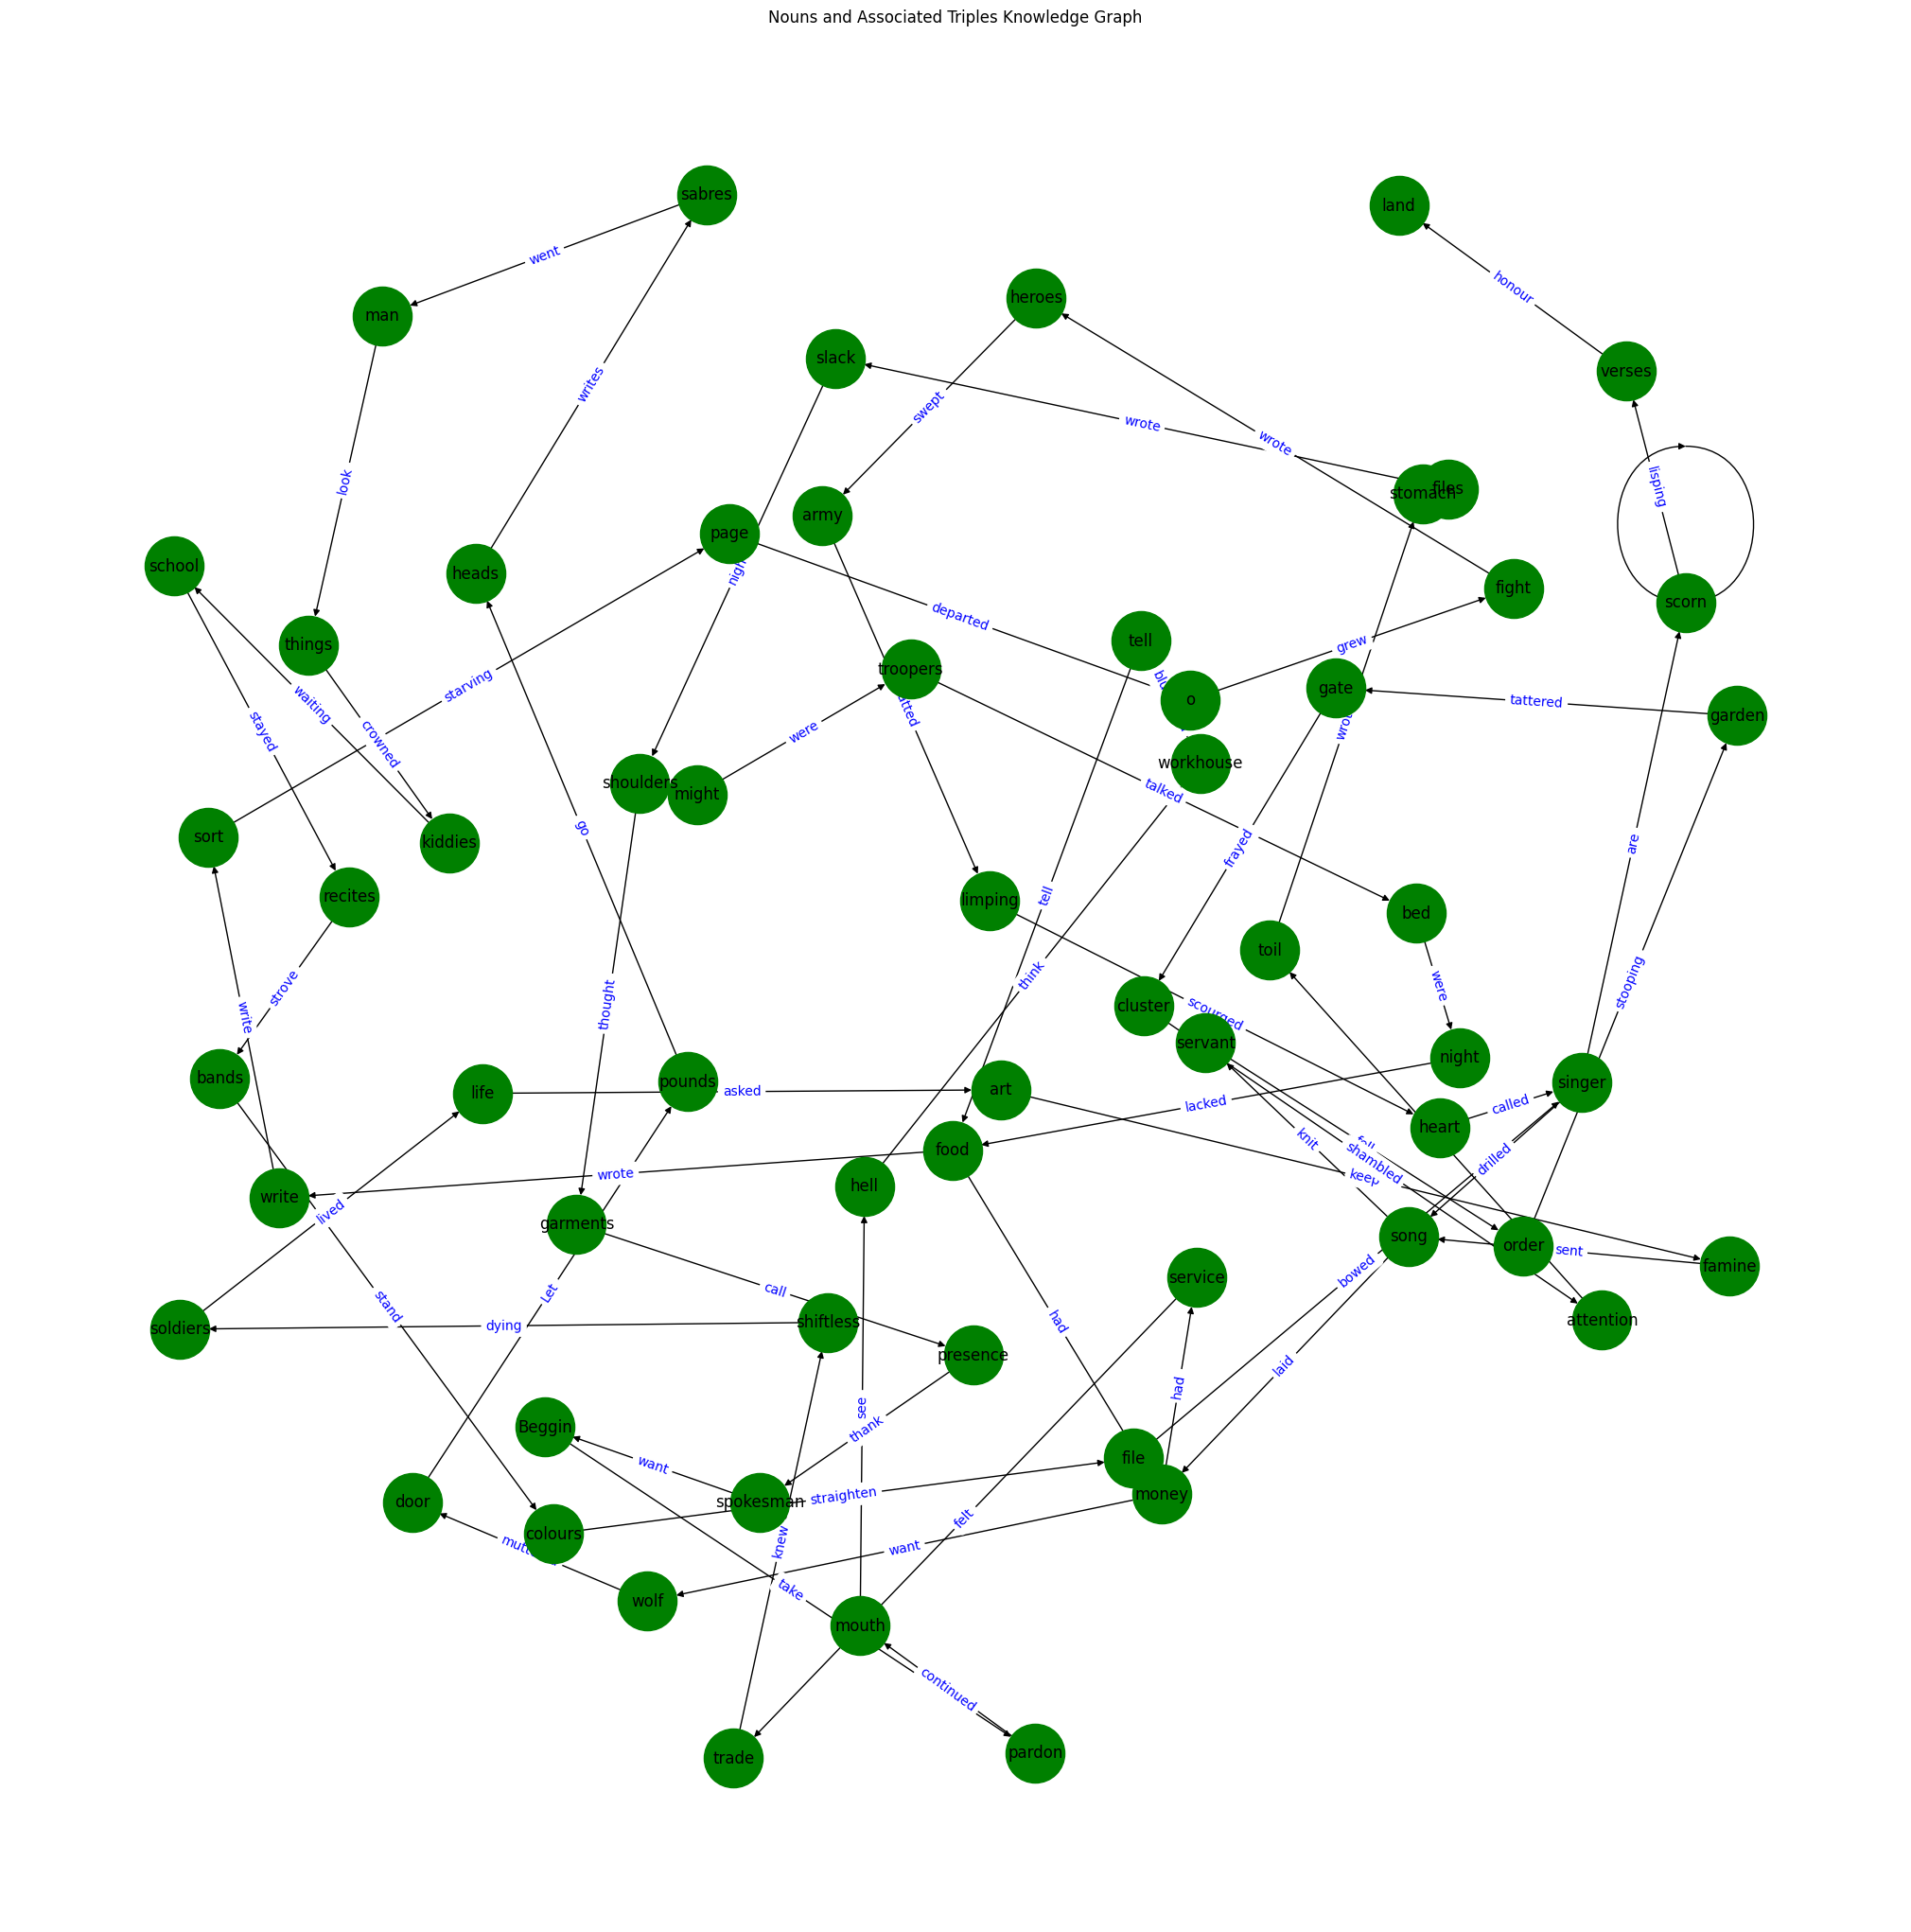

In [29]:
read_poem_and_generate_KG(id)

# 5. Knowledge Graph and RAG for article

In [30]:
!pip install weaviate-client langchain sentence-transformers tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [31]:
# !pip install

In [32]:
from langchain.text_splitter import TokenTextSplitter
from langchain.llms import HuggingFacePipeline
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.vectorstores import Weaviate
import weaviate

## Scraping news article

In [33]:
import requests
from bs4 import BeautifulSoup

def scrape_articles(url):
    # Send an HTTP request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all divs with class 'slice__content-container'
        main_containers = soup.find_all('div', class_='slice__content-container')

        # Initialize a list to store articles
        articles = []

        # Iterate through each main container div
        for main_container in main_containers:
            # Find all paragraphs within the current main container
            paragraphs = main_container.find_all('p')

            # Extract text from each paragraph and add to the articles list
            for paragraph in paragraphs:
                articles.append(paragraph.get_text(strip=True))

        return articles

    else:
        print(f"Failed to fetch the content. Status code: {response.status_code}")
        return None

# Usage
url = 'https://www.nam.ac.uk/explore/battle-balaklava'
result = scrape_articles(url)

if result:
    for i, article in enumerate(result, start=1):
        print(f"Paragraph {i}:\n{article}\n{'='*50}\n")


Paragraph 1:
Explore more fromCrimean War

Paragraph 2:
The Battle of Balaklava took place during the Crimean War (1854-56) on 25 October 1854. It witnessed one of the most famous acts of battlefield bravery, the Thin Red Line, and one of the most infamous blunders in military history, the Charge of the Light Brigade.

Paragraph 3:
Following the Battle of the Alma in September 1854, British, French and Ottoman forces had begun to besiege the Russian naval base ofSevastopol. The siege lines, running back to their base at Balaklava harbour, went through two valleys and a ridge, and were vulnerable.

Paragraph 4:
Seeking to take advantage of this, the Russians planned to break the British lines and then capture the base.

Paragraph 5:
The Russian commander, General Pavel Liprandi, started the battle by launching an assault to the north-east of Balaklava.

Paragraph 6:
His forces seized a series of Turkish positions on the heights overlooking the road between Balaklava and the Allied siege

## Knowledge graph without pre-processing

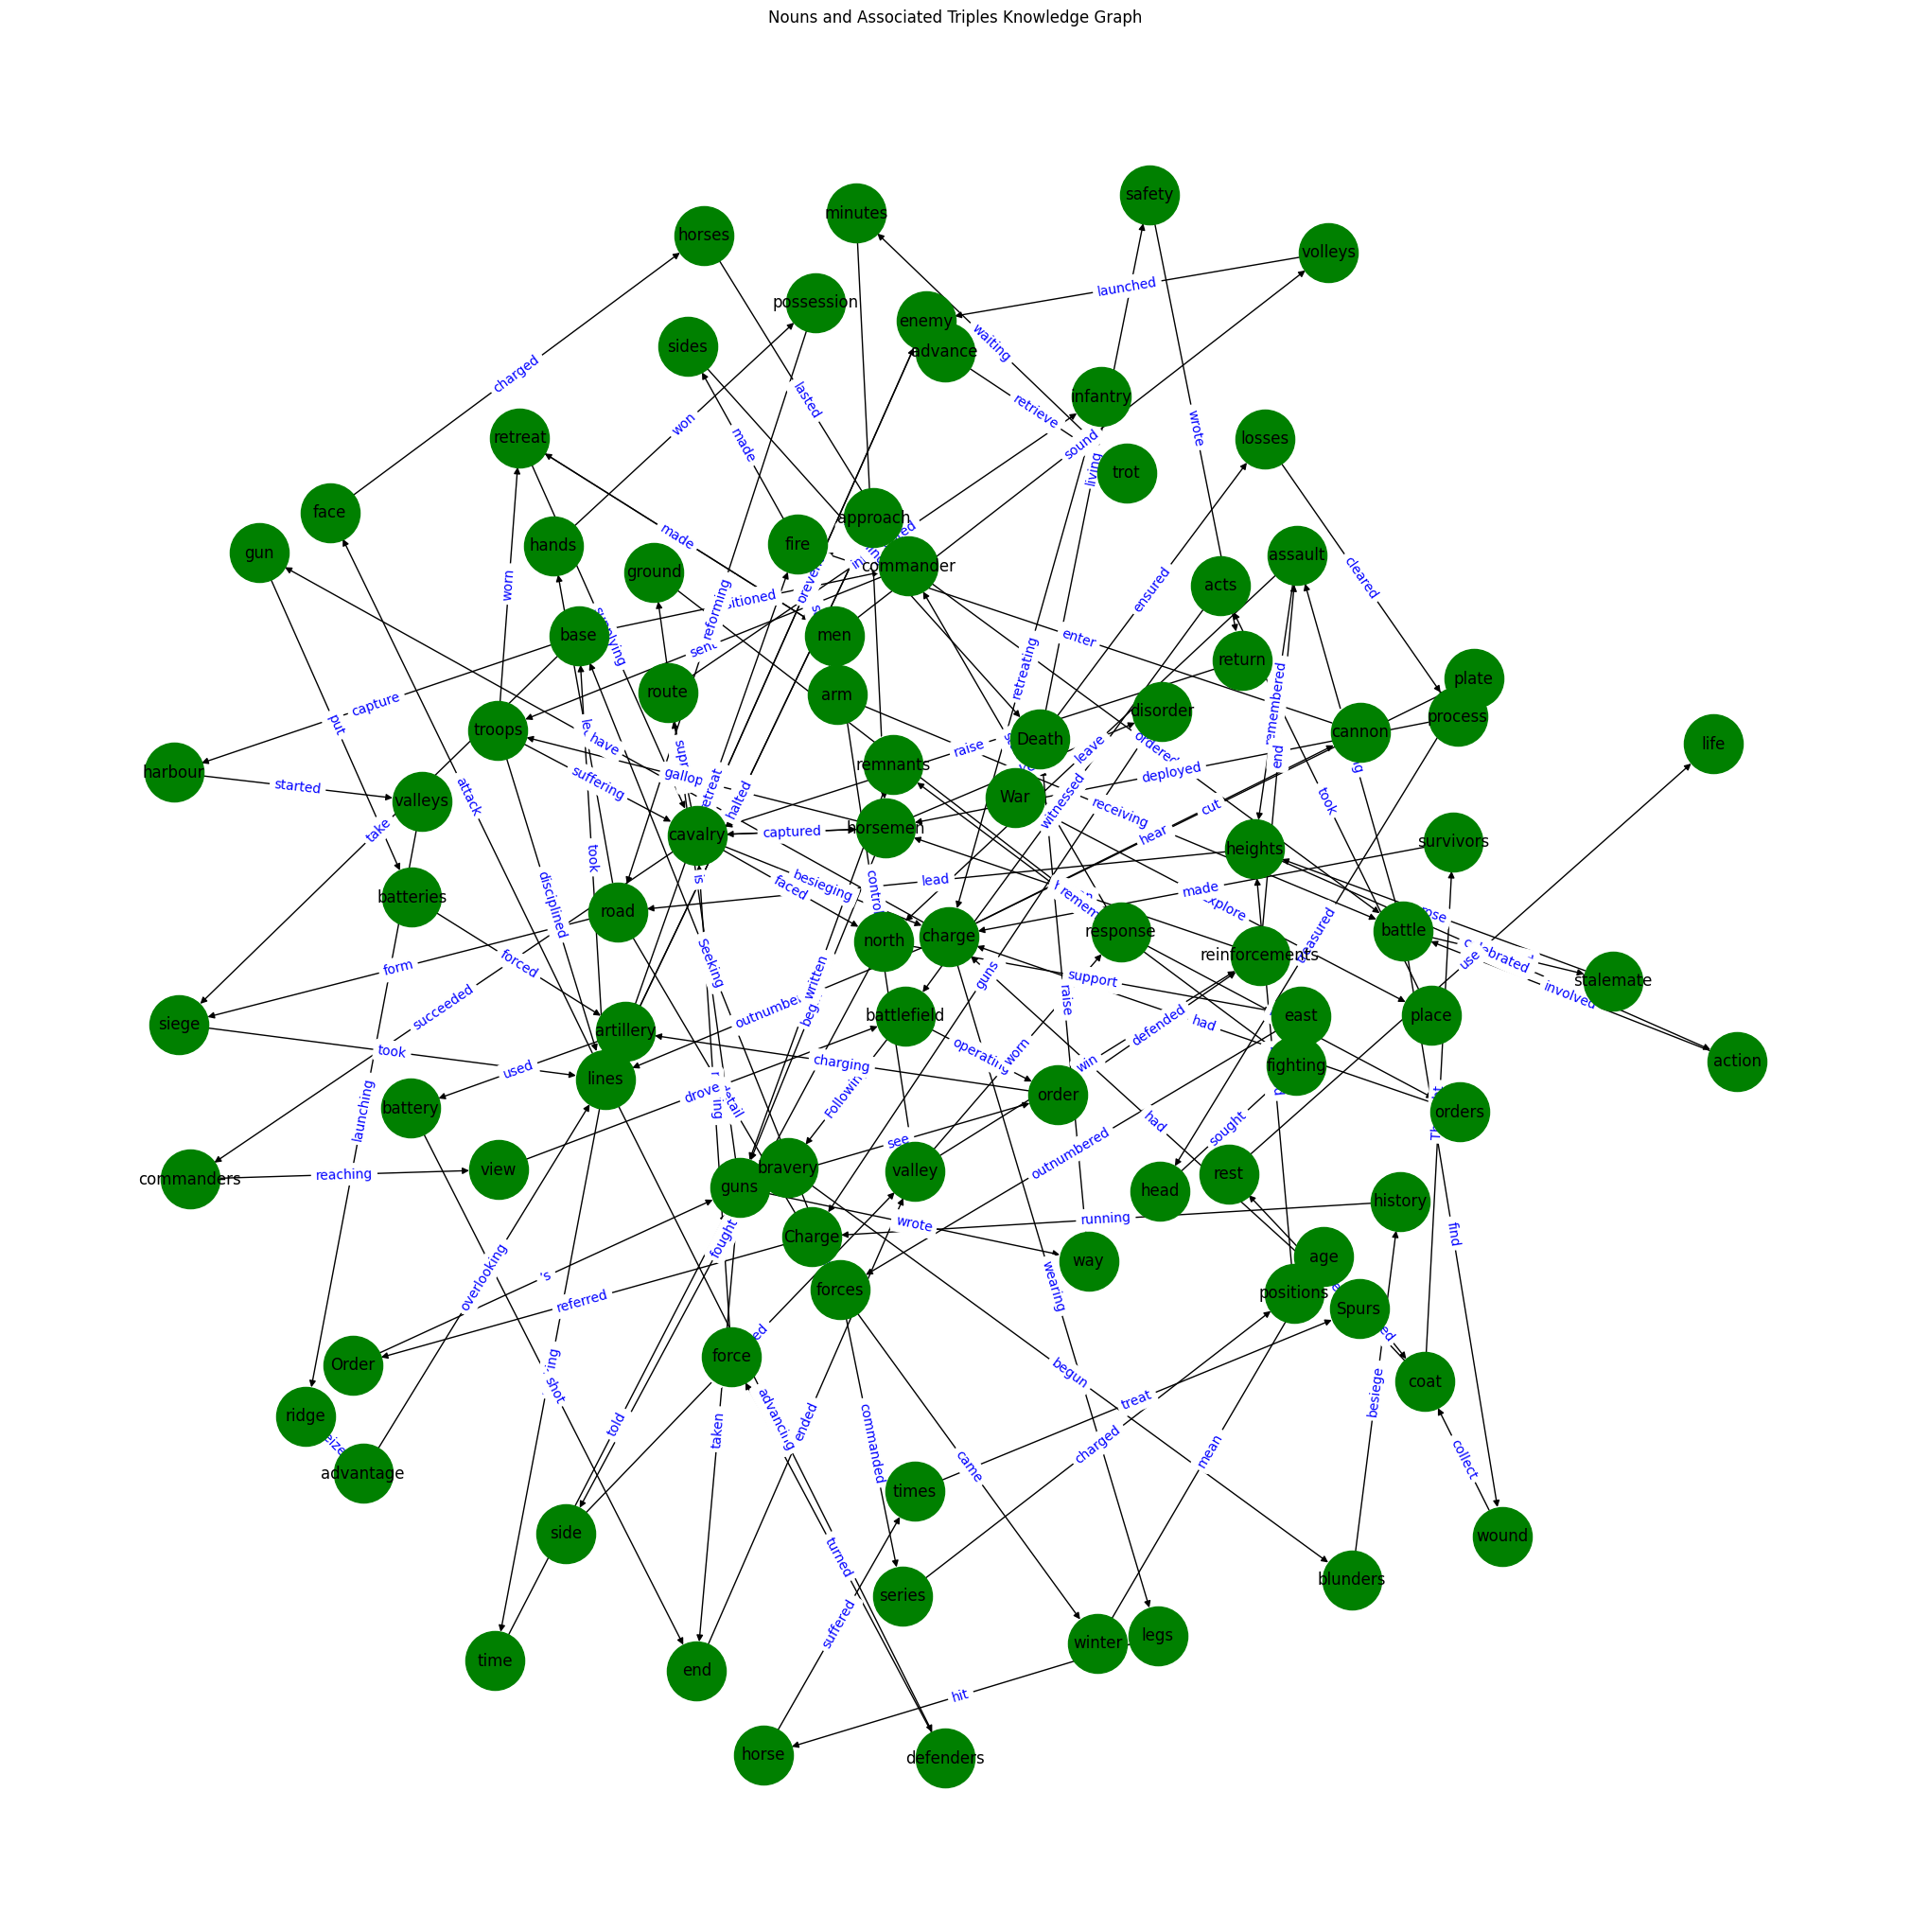

In [34]:
text_article = ' '.join(result)
nouns, _, triplets = create_nvn_triples(text_article)
article_graph = create_graph(triplets)
plot_nvn_graph(article_graph)

## RAG

Model

In [35]:
# specify stop token ids
stop_token_ids = [0]

# build huggingface pipeline for using zephyr-7b-alpha
pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    use_cache=True,
    device_map="auto",
    max_length=2048,
    do_sample=True,
    top_k=5,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,
)

llm = HuggingFacePipeline(pipeline=pipeline)

Weaviate setup

In [36]:
# WEAVIATE_URL = "https://hw-11-ml-nlp-s177kvrs.weaviate.network"
WEAVIATE_URL = "https://ml-final-duos-dcxskwul.weaviate.network"
WEAVIATE_API_KEY = "HVWri9aCuMHXsNdBqDEJEp5SRvkCmj2mnMgv"

client = weaviate.Client(
    url=WEAVIATE_URL, auth_client_secret=weaviate.AuthApiKey(WEAVIATE_API_KEY)
)

Embeddings

In [37]:
# specify embedding model (using huggingface sentence transformer)
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
    model_name=embedding_model_name, model_kwargs=model_kwargs
)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Create VectorDB for RAG

In [38]:
from langchain.document_loaders import TextLoader


texts = "".join("".join(t) for t in triplets)

# Initialize TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size=128, chunk_overlap=0)
documents = text_splitter.create_documents(texts)

# Split the documents
split_docs = text_splitter.split_documents(documents)

# Initialize Weaviate and create vector database
vector_db = Weaviate.from_documents(
    split_docs, embeddings, client=client, by_text=False
)

Create QA chain

In [39]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=vector_db.as_retriever()
)

Query the QA chain

In [40]:
response_before = qa_chain.run("Rudyard Kipling wrote a poem called 'The Last of the Light Brigade' in 1890. How does this poem relate to the events that occurred in his life or in India between 1865 and 1890?")


Before triplet in vector

In [41]:
response_before

" 'The Last of the Light Brigade' was written by Rudyard"

## Path 1: NVN for vector

Performed by: Poojan Shah

In [42]:
qa_chain_after = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=vector_db.as_retriever()
)

In [43]:
response_after = qa_chain_after.run("Rudyard Kipling wrote a poem called 'The Last of the Light Brigade' in 1890. How does this poem relate to the events that occurred in his life or in India between 1865 and 1890?")


In [44]:
print("After triplets in vector:")
response_after

After triplets in vector:


" Rudyard Kipling was an English poet and novelist who lived in India from 1865 to 1891. He was born in England and spent much of his childhood in the Indian subcontinent. The events of the Indian Rebellion of 1857, the Zulu War of 1879, and the Second Anglo-Afghan War of 1879-1880 greatly influenced his writing. These wars and the British Raj period in general are referenced in his writing, including the poem 'The Last of the Light Brigade'. The poem is believed to be inspired by the 1879 Zulu War and is considered a tribute to the British soldiers who fought in the war."

In [45]:
print("After triplets in vector:")
response_after

After triplets in vector:


" Rudyard Kipling was an English poet and novelist who lived in India from 1865 to 1891. He was born in England and spent much of his childhood in the Indian subcontinent. The events of the Indian Rebellion of 1857, the Zulu War of 1879, and the Second Anglo-Afghan War of 1879-1880 greatly influenced his writing. These wars and the British Raj period in general are referenced in his writing, including the poem 'The Last of the Light Brigade'. The poem is believed to be inspired by the 1879 Zulu War and is considered a tribute to the British soldiers who fought in the war."

## Path 2: SVO as input to RAG

Performed by: Sakshi Kekre

In [46]:
# Load spacy model
nlp = spacy.load('en_core_web_sm')

text_article = ' '.join(result)
# Process plain text with spacy
doc = nlp(text_article)
# Extract SVO list from spacy object
triples = list(textacy.extract.subject_verb_object_triples(doc))

print(triples)
# [SVOTriple(subject=[I], verb=[am, going], object=[to, extract, SVO])]

[SVOTriple(subject=[Battle], verb=[took], object=[place]), SVOTriple(subject=[It], verb=[witnessed], object=[one]), SVOTriple(subject=[forces], verb=[had, begun], object=[to, besiege, the, Russian, naval, base, ofSevastopol]), SVOTriple(subject=[Russians], verb=[planned], object=[to, break, the, British, lines]), SVOTriple(subject=[Russians], verb=[capture], object=[base]), SVOTriple(subject=[commander], verb=[started], object=[battle]), SVOTriple(subject=[forces], verb=[seized], object=[series]), SVOTriple(subject=[they], verb=[took], object=[guns]), SVOTriple(subject=[commander], verb=[ordered], object=[some]), SVOTriple(subject=[He], verb=[commanded], object=[force]), SVOTriple(subject=[route], verb=[was, blocked], object=[Regiment]), SVOTriple(subject=[infantry], verb=[would, form], object=[lines]), SVOTriple(subject=[Highlanders], verb=[took], object=[approach]), SVOTriple(subject=[commander], verb=[told], object=[troops]), SVOTriple(subject=[They], verb=[fired], object=[volleys])

In [47]:

texts = "".join("".join(t) for t in triplets)

# Initialize TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size=128, chunk_overlap=0)
documents = text_splitter.create_documents(texts)

# Split the documents
split_docs = text_splitter.split_documents(documents)

# Initialize Weaviate and create vector database
vector_db_SVO = Weaviate.from_documents(
    split_docs, embeddings, client=client, by_text=False
)

In [48]:
qa_chain_SVO = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=vector_db_SVO.as_retriever()
)

In [49]:
response_after_SVO = qa_chain_SVO.run("Rudyard Kipling wrote a poem called 'The Last of the Light Brigade' in 1890. How does this poem relate to the events that occurred in his life or in India between 1865 and 1890?")


In [50]:
response_after_SVO

" The events referred to in the poem 'The Last of the Light Brigade' are set in the 1860s, and are related to the Zulu War and the British involvement in South Africa. This war was fought against the Zulu kingdom in 1879, and the British suffered heavy casualties. The poem was written in 1890 and reflects the pride of the British people in their fighting forces, despite the heavy casualties they had suffered. The poem also highlights the importance of honor and duty in the British military code of conduct."

In [51]:
from IPython.display import HTML

wrapped_text_Without = f"<div style='word-wrap: break-word;'>{response_after}</div>"
wrapped_text_With = f"<div style='word-wrap: break-word;'>{response_after_SVO}</div>"

# Display the HTML
display(HTML("<h1>Response With NVN</h1>"))
display(HTML(wrapped_text_Without))
display(HTML("<br>"))
display(HTML("<h1>Response With SVO</h1>"))
display(HTML(wrapped_text_With))

# Conclusion:

The triplets, although making sense to the human eye, do not seem to be helping the model with retrieval or output generation.